# Peer-graded Assignment: Проект: предсказания победителя в онлайн-игре

# Подход 2: логистическая регрессия

In [252]:
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc

%matplotlib inline

features_train = pd.read_csv('features.csv', index_col='match_id')
r, c = features.shape

C_row = range(-5, 5)
C = [10 ** i for i in C_row]

# Удаление признаков связанных с результатами матчей и заполнение признаков с пропусками нулями
def features_clean(X):
    X = X.drop([
        'duration',
        'radiant_win',
        'tower_status_radiant',
        'tower_status_dire',
        'barracks_status_radiant',
        'barracks_status_dire'], axis=1)
    X = X.fillna(value=0)
    
    return X

# Масштабируем данные
def features_scaler(X):
    scaler = StandardScaler()
    X_scale = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

    return X_scale

# Удаляем категориальные признаки
def features_clean_categories(X):
    X_without_categories = X.copy()
    X_without_categories = X.drop([
        'lobby_type',
        'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
        'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'
    ], axis=1)
    
    return X_without_categories

# Создание новых признаков на основе "мешка слов"
def features_create(X, heroes_count):
    X_pick = np.zeros((X.shape[0], heroes_count))

    for i, match_id in enumerate(X.index):
        for p in xrange(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
    
    heroes_columns = ['h' + str(i) for i in xrange(1, heroes_count+1)]
    X_pick = pd.DataFrame(X_pick, index=X.index, columns=heroes_columns)
#X_heroes.columns = index_heroes

    return X_pick

# Функция тестирования модели с заданным параметром C
def model_test(X, y, C = [0.1]):
    scores = np.array([])
    for c in C:
        print("C = %f" % c)
        cv = KFold(n_splits=5, shuffle=True, random_state=241)
        model = LogisticRegression(C=c)
#        model = LogisticRegression(penalty='l2', solver='saga', C=c)
        start_time = datetime.datetime.now()
        score = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        print 'Time elapsed: ', datetime.datetime.now() - start_time
        print 'Score: ', score
        scores = np.append(scores, score.mean())
    return scores

def get_best_c(scores, C):
    evaluation = 0
    c = 0
    for i in xrange(len(scores)):
        if evaluation < scores[i]:
            c = i
            evaluation = scores[i]
    
    return evaluation, C[c]

def get_plot_C(C_row, scores):
    plt.plot(C_row, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()
    
#
#    
# X -
#X = features.copy()
#X, y = features_clean(X)
#X = features_scaler(X)

#X_ = features_clean_categories(X)

In [219]:
# First - Тестирование на сырых данных

X = features.copy()
y = np.ravel(X['radiant_win'])
X = features_clean(X)
X = features_scaler(X)


C = 0.000010
Time elapsed:  0:00:02.984200
Score:  [ 0.69959206  0.69159358  0.69419291  0.69433159  0.69589176]
C = 0.000100
Time elapsed:  0:00:04.033679
Score:  [ 0.7161759   0.7083769   0.70960313  0.71017245  0.71192219]
C = 0.001000
Time elapsed:  0:00:07.503420
Score:  [ 0.72134945  0.71368677  0.71425051  0.71512064  0.71649386]
C = 0.010000
Time elapsed:  0:00:09.861405
Score:  [ 0.7216634   0.71377395  0.71440813  0.71540233  0.7164595 ]
C = 0.100000
Time elapsed:  0:00:10.346808
Score:  [ 0.72165841  0.7137031   0.71438941  0.71539496  0.71640454]
C = 1.000000
Time elapsed:  0:00:10.313886
Score:  [ 0.72165762  0.71369565  0.71438656  0.71539329  0.7163998 ]
C = 10.000000
Time elapsed:  0:00:10.336272
Score:  [ 0.72165702  0.7136947   0.71438623  0.71539423  0.71639952]
C = 100.000000
Time elapsed:  0:00:10.336314
Score:  [ 0.72165734  0.71369455  0.7143859   0.71539408  0.71639946]
C = 1000.000000
Time elapsed:  0:00:10.327244
Score:  [ 0.72165734  0.71369457  0.71438593  0

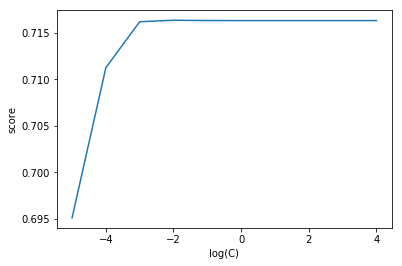

The best score is 0.716341 with C = 0.010000


In [217]:
scores_first = model_test(X, y, C)
evaluation_first, c_first = get_best_c(scores_first, C)
get_plot_C(C_row, scores_first)
print("The best score is %f with C = %f" % (evaluation_first, c_first))

In [220]:
# SECOND - Тестирование на данных без категориальных признаков

X_ = features_clean_categories(X)


C = 0.000010
Time elapsed:  0:00:03.283038
Score:  [ 0.69961316  0.69150564  0.69419646  0.69425458  0.69571482]
C = 0.000100
Time elapsed:  0:00:03.404312
Score:  [ 0.71630684  0.70828717  0.70971489  0.71020968  0.71172337]
C = 0.001000
Time elapsed:  0:00:06.580488
Score:  [ 0.72152794  0.71360976  0.71445497  0.71521698  0.71636831]
C = 0.010000
Time elapsed:  0:00:08.833186
Score:  [ 0.7218164   0.71370124  0.71462628  0.71551614  0.71634469]
C = 0.100000
Time elapsed:  0:00:09.092890
Score:  [ 0.72181205  0.7136378   0.7146095   0.71551012  0.71629945]
C = 1.000000
Time elapsed:  0:00:09.124259
Score:  [ 0.72181039  0.71363045  0.71460884  0.71551016  0.71629392]
C = 10.000000
Time elapsed:  0:00:09.201163
Score:  [ 0.72181043  0.71362965  0.71460893  0.71551033  0.71629306]
C = 100.000000
Time elapsed:  0:00:09.895726
Score:  [ 0.72181067  0.71362945  0.71460889  0.71551027  0.71629322]
C = 1000.000000
Time elapsed:  0:00:09.724527
Score:  [ 0.72181072  0.71362952  0.71460893  0

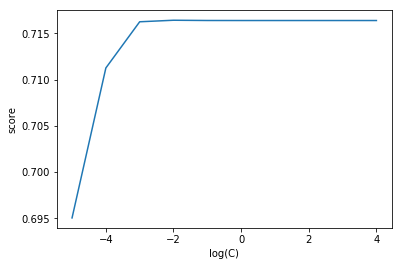

The best score is 0.716401 with C = 0.010000


In [222]:
scores_second = model_test(X_, y, C)
evaluation_second, c_second = get_best_c(scores_second, C)
get_plot_C(C_row, scores_second)
print("The best score is %f with C = %f" % (evaluation_second, c_second))

In [228]:
hero_columns = ['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
hero_values = np.array([])

for column in hero_columns:
    t = features['r1_hero'].unique()
    hero_values = np.append(hero_values, t)

heroes_count_train = len(np.unique(hero_values))
print("There are %d heroes used at train data." % heroes_count)

heroes = pd.read_csv('heroes.csv')
heroes_count = len(heroes)
print("There are %d heroes used at the game (data from heroes.csv)" % heroes_count)

There are 108 heroes used at train data.
There are 112 heroes used at the game (data from heroes.csv)


In [235]:
features.r1_hero[0]

11

In [243]:
# ThIRD - Тестирование с добавлением новых признаков героев

X_pick = features_create(features, heroes_count=heroes_count)
X_bag = pd.concat([X_, X_pick], axis=1)

C = 0.000010
Time elapsed:  0:00:02.718068
Score:  [ 0.70384072  0.69557033  0.69838234  0.69839816  0.69966507]
C = 0.000100
Time elapsed:  0:00:04.201648
Score:  [ 0.7300782   0.7222305   0.72367081  0.72384682  0.72528442]
C = 0.001000
Time elapsed:  0:00:08.535991
Score:  [ 0.75073228  0.74413908  0.74560954  0.74433549  0.74666478]
C = 0.010000
Time elapsed:  0:00:14.065867
Score:  [ 0.75511581  0.7496667   0.7517913   0.74944059  0.75266536]
C = 0.100000
Time elapsed:  0:00:19.017103
Score:  [ 0.7551572   0.74990841  0.75213544  0.74956231  0.75292389]
C = 1.000000
Time elapsed:  0:00:19.909531
Score:  [ 0.75512742  0.74989818  0.75212697  0.74954165  0.75290449]
C = 10.000000
Time elapsed:  0:00:20.070919
Score:  [ 0.75512089  0.74989744  0.75212535  0.74954013  0.75290264]
C = 100.000000
Time elapsed:  0:00:19.984604
Score:  [ 0.75512029  0.74989741  0.75212493  0.74954004  0.75290224]
C = 1000.000000
Time elapsed:  0:00:20.351875
Score:  [ 0.75512035  0.74989711  0.75212518  0

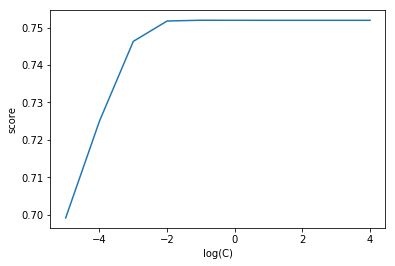

The best score is 0.751937 with C = 0.100000


In [247]:
scores_bag = model_test(X_bag, y, C)
evaluation_bag, c_bag = get_best_c(scores_bag, C)
get_plot_C(C_row, scores_bag)
print("The best score is %f with C = %f" % (evaluation_bag, c_bag))

In [260]:
# Тестирование на данных c мешком слов

features_test = pd.read_csv('features_test.csv', index_col='match_id')
X_test = features_test.copy()
X_test = X_test.fillna(0)
#X_test = features_clean(features_test)
X_test = features_scaler(X_test)
X_test = features_clean_categories(X_test)
X_pick1 = features_create(features_test, heroes_count=heroes_count)
X_test = pd.concat([X_test, X_pick1], axis=1)

model = LogisticRegression(C=0.1, random_state=241, n_jobs=-1)
model.fit(X_bag, y)

pred = model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'match_id':list(X_test.index),
    'radiant_win':list(pred)
})

submission.to_csv('dota2_predicts_logreg.csv', index=False)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=241, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
Kaggle score 0.75526

In [283]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=250, learning_rate=0.05).fit(X_bag, y)
predictions = gbm.predict(X_test)

In [284]:
predictions

array([1, 1, 0, ..., 0, 0, 1])